In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_permit_data_v2.csv')

In [3]:
df.head(3)

,permit,parcel,owner,contractor,neighborhood,ward,clean_ward,cost,issued,year,mn,address,geocoder_recognized_address,lon,lat,structure_type,work description,work_type,high_cost,area
0,11-b-03000,0048s00284000000,pfohl donald e & lucy g (w),nh construction llc,not_listed,6.0,6.0,200000.0,2012-01-30 00:00:00,2012,1,"3418 penn avenue, pittsburgh, pa","3418 Penn Ave, Pittsburgh, PA 15201-1304, Unit...",-79.96646,40.46286,not_listed,interior fitout for yoga studio\n-pittsburgh b...,not_listed,1,Lower Lawrenceville
1,11-b-03019,0006r00206000000,p7 investments lp,heartland homes inc,not_listed,19.0,19.0,100000.0,2012-01-04 00:00:00,2012,1,"435 sweetbriar street, pittsburgh, pa","435 Sweetbriar St, Pittsburgh, PA 15211-1121, ...",-80.02220,40.43474,not_listed,new 3 story single family dwelling with 2 car ...,not_listed,1,Mt Washington_Beechview
2,11-b-03021,0006r00206000000,dugan timothy,heartland homes inc,not_listed,19.0,19.0,100000.0,2012-01-04 00:00:00,2012,1,"437 sweetbriar street 435, pittsburgh, pa","435 Sweetbriar St, Pittsburgh, PA 15211-1121, ...",-80.02220,40.43474,not_listed,new 3 story single family dwelling with 2 car ...,not_listed,1,Mt Washington_Beechview


In [41]:
sorted(df.neighborhood.unique().tolist())

['allegheny center',
 'allegheny west',
 'allegheny west;north shore;allegheny center',
 'allentown',
 'arlington',
 'banksville',
 'bedford dwellings',
 'beechview',
 'beltzhoover',
 'beltzhoover;bon air',
 'beltzhoover;bon air;knoxville',
 'bloomfield',
 'bluff',
 'bon air',
 'brighton heights',
 'brighton heights;marshall-shadeland',
 'brookline',
 'brookline;overbrook',
 'california-kirkbride',
 'carrick',
 'carrick;bon air',
 'carrick;knoxville',
 'carrick;overbrook',
 'central business district',
 'central business district;morningside',
 'central lawrenceville',
 'central lawrenceville;lower lawrenceville',
 'central lawrenceville;stanton heights',
 'central northside',
 'central oakland',
 'central oakland;north oakland',
 'central oakland;squirrel hill south;squirrel hill north',
 'chartiers city',
 'chateau',
 'crafton heights',
 'crawford-roberts',
 'duquesne heights',
 'east allegheny',
 'east carnegie',
 'east hills',
 'east liberty',
 'elliott',
 'esplen',
 'fairywood',
 

In [46]:
nbrhd = {3: 'Lower Hill District',
4: 'Oakland_Soho',
5: 'Upper Hill District',
8: 'Bloomfield',
11: 'East Liberty_Highland Park',
12: 'Lincoln_Lemington_Belmar',
13: 'Homewood',
14: 'Pt Breeze_Squirrel Hill',
15: 'Hazelwood_Greenfield',
16: 'South Side_Arlington',
31: 'Hays_Lincoln Place',
20: 'West End',
28: 'Chartiers',
29: 'Carrick',
30: 'Knoxville',
32: 'Overbrook',
2: 'Strip District',
6: 'Lower Lawrenceville',
9: 'Central Lawrenceville',
10: 'Upper Lawrenceville_Morningside',
17: 'South Side',
18: 'Allentown',
21: 'Manchester',
22: 'North Side',
23: 'East Allegheny',
24: 'Troy Hill_Spring Garden',
25: 'Fineview',
26: 'Perrysville_Riverview',
1: 'Ctr Business District_Bluff',
7: 'Shadyside',
19: 'Mt Washington_Beechview',
27: 'Marshall_Shadeland'}

In [47]:
df['area'] = df.clean_ward.apply(lambda x: nbrhd[x])

In [30]:
df.groupby(['year','area']).agg({'cost':['sum','median','mean','count']}).round()

cost                         
                                             sum   median      mean count
year area                                                                
2012 Allentown                          764255.0   8398.0   25475.0    30
     Bloomfield                       22613403.0  17500.0  305587.0    74
     Carrick                            575082.0   5650.0   23962.0    24
     Central Lawrenceville            11473240.0  14000.0   98062.0   117
     Chartiers                          982018.0   7500.0   23381.0    42
...                                          ...      ...       ...   ...
2021 Strip District                   10877490.0  35000.0  265305.0    41
     Troy Hill_Spring Garden            358000.0  25000.0   89500.0     4
     Upper Hill District                909136.0   5400.0   37881.0    24
     Upper Lawrenceville_Morningside    669019.0   5832.0   13938.0    48
     West End                            59585.0   4239.0    7448.0     8

[319 rows x 4 columns]

In [5]:
near = [3,5,6,8,9,10,23,24]
yrs = list(range(2012,2021))

In [29]:
df[df.clean_ward.isin(near) & df.year.isin(yrs)].groupby(['year','clean_ward']).agg({'cost':'sum'}).unstack(1)

cost                                                      \
clean_ward         3.0          5.0          6.0          8.0          9.0    
year                                                                          
2012         3210248.25   7827484.00  11147202.18  22613403.00  11473240.34   
2013         6839272.00  23414148.00   6404731.00  49542693.00   5159272.00   
2014         8639787.00   1866243.00   4986478.00  23880333.00   9123754.00   
2015        30576034.00  12065472.00  43151424.00  17413054.00  10672329.00   
2016         5498763.00  14940004.00  47724493.00   9660911.64  57564968.00   
2017        28757200.00  17129966.00  44502063.00  49762937.00  28619914.00   
2018        25253755.00   4088761.00  13901422.25  21829598.00  28947899.00   
2019         5494827.00   2521327.43  36912938.00  27423880.72  22198089.00   
2020        12855055.55  36487787.72  90304394.77  52318766.01  11648786.29   

                                                  
clean_ward         10.0         23.0        24.0  
year                                              
2012         1975873.82   3704630.00   1004706.0  
2013         3168841.00   1726573.13   1281969.0  
2014         3769803.00   2476987.00    448069.0  
2015         8123498.00   3428039.00   1253922.0  
2016        10376032.00  24643204.00   1486736.6  
2017        31564297.00  12201322.00   2887561.0  
2018        16754616.00   9792448.00   3451331.0  
2019        25203988.37   5720940.58  11313463.0  
2020        17747584.95  13729389.00   3162660.0

In [7]:
adjacent_wards = df[df.clean_ward.isin(near) & df.year.isin(yrs)].groupby(['year','clean_ward'])

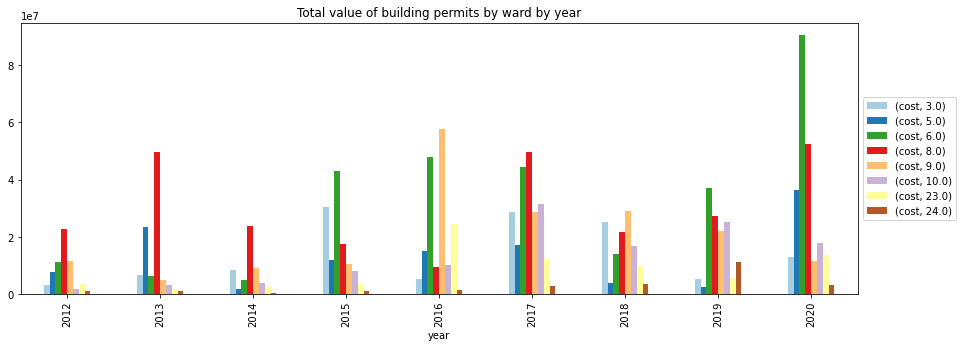

In [8]:
adjacent_wards.agg({'cost':'sum'}).unstack(1).plot.bar(
    figsize=[15,5], title='Total value of building permits by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

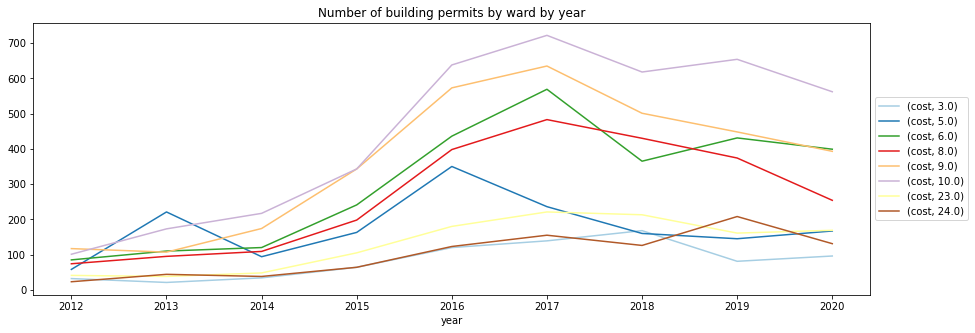

In [9]:
adjacent_wards.agg({'cost':'count'}).unstack(1).plot(
    figsize=[15,5],title='Number of building permits by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

In [10]:
# Though we do not have all splits on residential v. commercial, look at the typical cost of such permits
df.groupby(['structure_type', 'year']).median()

clean_ward     cost  mn        lon  \
structure_type              year                                       
commercial                  2019         8.0  38665.0   9 -79.969300   
                            2020         7.0  36000.0   6 -79.977210   
                            2021         7.0  36500.0   1 -79.970185   
commercial - all other uses 2019         9.0  16250.0   9 -79.975670   
                            2020         8.0  17000.0   6 -79.976710   
                            2021         6.5  21670.0   1 -79.979680   
not_listed                  2012        14.0  15000.0   6 -79.965190   
                            2013        14.0  13472.5   6 -79.968450   
                            2014        14.0   9661.5   6 -79.960760   
                            2015        14.0   6000.0   9 -79.963840   
                            2016        13.0   4758.0   6 -79.963930   
                            2017        13.0   5431.0   5 -79.965280   
                            2018        13.0   5100.0   6 -79.966725   
                            2019        12.0   6000.0   3 -79.962760   
                            2020         9.0   3250.0   6 -79.976680   
                            2021        12.0   8000.0   1 -79.952770   
residential                 2019        13.0   7635.0  10 -79.954960   
                            2020        14.0   7000.0   7 -79.958110   
                            2021        13.0   6873.0   1 -79.959460   
residential - single family 2019        14.0   5000.0   9 -79.957800   
                            2020        14.0   6001.0   6 -79.959190   
                            2021        14.0   5500.0   1 -79.958130   
residential - two-family    2019        15.0   5000.0   9 -79.965890   
                            2020        15.0   5725.5   6 -79.967310   
                            2021        14.0  23000.0   1 -79.976600   

                                        lat  high_cost  
structure_type              year                        
commercial                  2019  40.444940          1  
                            2020  40.446300          1  
                            2021  40.444970          1  
commercial - all other uses 2019  40.444940          1  
                            2020  40.447200          1  
                            2021  40.446120          1  
not_listed                  2012  40.447305          1  
                            2013  40.446485          0  
                            2014  40.448650          0  
                            2015  40.449855          0  
                            2016  40.448550          0  
                            2017  40.450540          0  
                            2018  40.449420          0  
                            2019  40.449620          0  
                            2020  40.446770          0  
                            2021  40.441400          0  
residential                 2019  40.457630          0  
                            2020  40.457050          0  
                            2021  40.461300          0  
residential - single family 2019  40.452775          0  
                            2020  40.451965          0  
                            2021  40.456260          0  
residential - two-family    2019  40.455650          0  
                            2020  40.455890          0  
                            2021  40.452610          1

It looks like the typical residential permit is 5-7k range while the typical commerical permit is 15+. This could be a basic gauge for looking at a split between high- and low-value permits by ward.

In [11]:
df['high_cost'] = df.cost.apply(lambda x: 1 if x >= 15000 else 0)

In [12]:
df.groupby(['year','area']).agg({'cost': 'count','high_cost':['sum','median','mean']})

cost high_cost                 
                                     count       sum median      mean
year area                                                            
2012 Allentown                          30        11    0.0  0.366667
     Bloomfield                         74        38    1.0  0.513514
     Carrick                            24         7    0.0  0.291667
     Central Lawrenceville             117        58    0.0  0.495726
     Chartiers                          42         9    0.0  0.214286
...                                    ...       ...    ...       ...
2021 Strip District                     41        23    1.0  0.560976
     Troy Hill_Spring Garden             4         3    1.0  0.750000
     Upper Hill District                24         9    0.0  0.375000
     Upper Lawrenceville_Morningside    48        12    0.0  0.250000
     West End                            8         1    0.0  0.125000

[319 rows x 4 columns]

In [13]:
proportion_high = df.groupby(['year','clean_ward']).agg({'cost': 'count','high_cost':['sum','median','mean']}).iloc[:,0:2]

In [14]:
proportion_high['prop_high'] = proportion_high.iloc[:,1]/proportion_high.iloc[:,0]

In [25]:
proportion_high['prop_high'].loc[yrs,near].unstack(1).iloc[:,:-1].round(3)

clean_ward,3.0,5.0,6.0,8.0,9.0,10.0,23.0
year,,,,,,,
2012,0.625,0.259,0.518,0.514,0.496,0.287,0.683
2013,0.619,0.814,0.518,0.442,0.449,0.318,0.421
2014,0.471,0.128,0.450,0.431,0.477,0.272,0.625
2015,0.500,0.497,0.344,0.288,0.321,0.245,0.305
2016,0.275,0.243,0.252,0.241,0.234,0.190,0.261
2017,0.576,0.174,0.316,0.333,0.263,0.289,0.308
2018,0.310,0.250,0.277,0.272,0.259,0.230,0.282
2019,0.259,0.262,0.374,0.422,0.306,0.257,0.379
2020,0.344,0.413,0.421,0.398,0.349,0.253,0.450


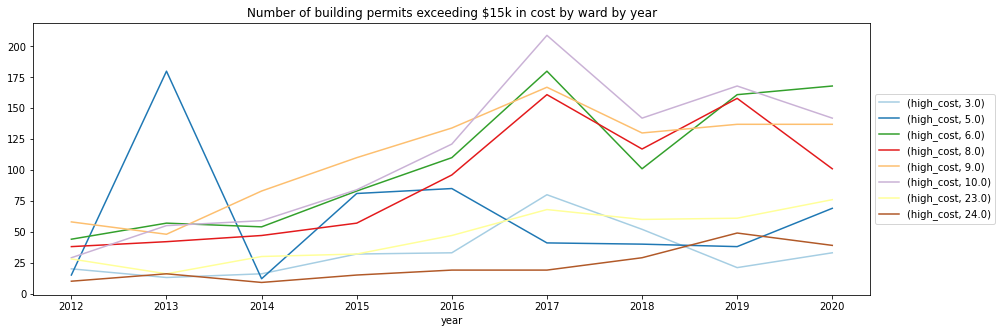

In [17]:
adjacent_wards.agg({'high_cost':'sum'}).unstack(1).plot(
    figsize=[15,5],title='Number of building permits exceeding $15k in cost by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

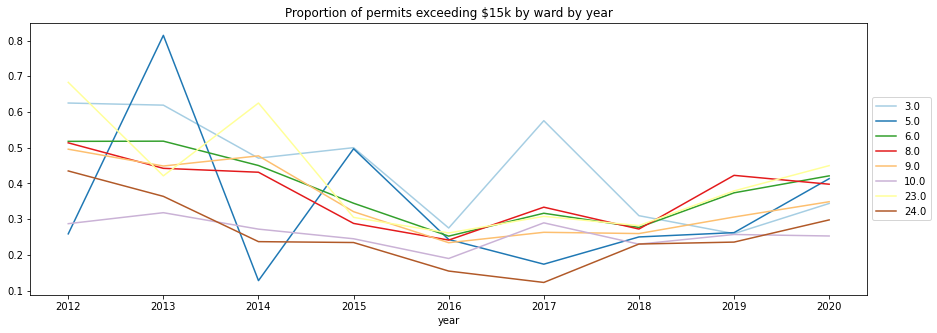

In [18]:
proportion_high['prop_high'].loc[yrs,near].unstack(1).plot(
    figsize=[15,5],title='Proportion of permits exceeding $15k by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

In [53]:
df.to_csv('final_permit_data.csv', index=False)